In [1]:
import gc
gc.collect()
import os
from os.path import isfile, join

import pandas as pd
import numpy as np


In [2]:
## initalizing parquet

import parquet
import csv
import StringIO

class Options(object):

    def __init__(self, col=None, format='csv', no_headers=True, limit=-1):
        self.col = col
        self.format = format
        self.no_headers = no_headers
        self.limit = limit


def read_parquet_data (filename):
    
    actual_raw_data = StringIO.StringIO()
    parquet.dump(filename, Options(format='csv'), out=actual_raw_data)
    actual_raw_data.seek(0, 0)
    actual_data = list(csv.reader(actual_raw_data, delimiter='\t'))
    
    return actual_data

In [20]:
## read graph data

import time
import gzip
from multiprocessing import Pool


##GRAPH_DIR  = "/home/sirorezka/python_proj/SNA_Hackaton/Data_short/trainGraph"
N_PROCS = 8


# aprx 8 minutes
def read_graph_files (gz_file):
    
    graph_data = []
    
    with gzip.open(os.path.join(GRAPH_DIR,gz_file), 'rb') as f:
        for line in f:
            data = line.split("\t")
            user = data[0]
            all_friends = line.split("\t")[1].replace("{(","").replace(")}", "").replace("\n","").split("),(")
            #all_friends = map (lambda x: [user] + x.split(","),all_friends)
            
            # to count number of users
            all_friends = [[user , len(all_friends)]]
            graph_data += all_friends 
    
    print "finished file: ",gz_file
    
    graph_data = pd.DataFrame(graph_data, dtype="int32")
    return graph_data

def read_graph_files_par ():
    
        tic = time.time()
        gz_files = [f for f in os.listdir(GRAPH_DIR) if f.endswith('.gz')]
        print (gz_files)
        pool = Pool(processes = N_PROCS)
        graph_data_full = pool.map(read_graph_files, gz_files)
        pool.close()
        pool.join()            
        toc = time.time() - tic
        print "elapsed time", toc
        
        #graph_data_full = pd.DataFrame(graph_data_full)
        return graph_data_full

In [31]:
graph_data = read_graph_files_par()

tt = pd.DataFrame(graph_data[0])

['part-v008-o000-r-00000.gz']
elapsed time 5.11612200737
finished file:  part-v008-o000-r-00000.gz


(62702, 2)


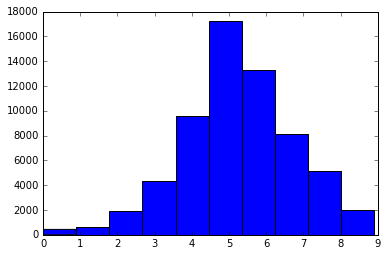

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.hist(np.log(tt.iloc[:,1]))
plt.show
print (tt.shape)

In [4]:
DEMO_PATH = "/home/sirorezka/python_proj/SNA_Hackaton/Data/demography"
demo_files = [f for f in os.listdir(DEMO_PATH) ]
tt = list(map (lambda x: x not in ['.pig_schema','_SUCCESS','.pig_header'],demo_files))
demo_files = pd.DataFrame(demo_files)
demo_files = demo_files.loc[tt]
demo_files = [k[0] for k in demo_files[:].values.tolist()]


In [5]:
def read_demo_data(demo_files):
    
    #print (demo_files)
    demo_data = []
    for demo_file in demo_files:
        print demo_file
        with open(os.path.join(DEMO_PATH,demo_file), 'rb') as f:
            for line in f:
                data = line.replace("\n","").split("\t")
                demo_data += [data] 

    print "finished all files"
    
    demo_data = pd.DataFrame(demo_data, dtype="int32")
    demo_data.columns = ["userId","create_date","birth_date","gender","ID_country","ID_Location","loginRegion"]
    return demo_data



In [6]:
demo_data = read_demo_data(demo_files)


part-v003-o000-r-00012
part-v003-o000-r-00011
part-v003-o000-r-00003
part-v003-o000-r-00008
part-v003-o000-r-00000
part-v003-o000-r-00001
part-v003-o000-r-00015
part-v003-o000-r-00009
part-v003-o000-r-00013
part-v003-o000-r-00006
part-v003-o000-r-00005
part-v003-o000-r-00004
part-v003-o000-r-00014
part-v003-o000-r-00010
part-v003-o000-r-00002
part-v003-o000-r-00007
finished all files


In [7]:
demo_data.describe()

,userId,create_date,birth_date,gender,ID_country,ID_Location,loginRegion
count,1002816.000000,1.002816e+06,1002816.000000,1002816.000000,1.002816e+06,1002816.000000,1.002816e+06
mean,32944520.068690,1.307905e+06,4906.555356,1.469874,1.823114e+09,5655742.863679,1.703598e+03
std,18991416.748978,1.234663e+09,6015.250529,0.499092,5.339787e+07,8553884.665645,1.682588e+06
min,45.000000,-2.147480e+09,-25567.000000,1.000000,4.461279e+08,70.000000,0.000000e+00
25%,16442421.250000,-1.067296e+09,3066.000000,1.000000,1.824599e+09,1739720.000000,0.000000e+00
50%,32937492.500000,-1.943580e+06,6264.000000,1.000000,1.824599e+09,3385314.000000,3.000000e+00
75%,49407543.250000,1.073568e+09,8586.000000,2.000000,1.827297e+09,4273169.000000,2.200000e+01
max,65746491.000000,2.147481e+09,31104.000000,2.000000,2.044172e+09,44687409.000000,1.684956e+09


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline  

demo_data['loginRegion'].summary()

AttributeError: 'Series' object has no attribute 'summary'